In [ ]:
캐글데이터
https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions
    
[ 뇌파를 바탕으로 감정분석 ]

뇌파 데이터 세트: 감정을 느끼는 것
뇌에서 포착된 긍정적이고 부정적인 감정 경험  

EEG Brainwave Dataset: Feeling Emotions
Positive and Negative emotional experiences captured from the brain

In [ ]:
OTHMANE EL MEKAOUI +2 · 3MO AGO · 1,165 VIEWS

Copy & Edit

12
bronze medal
EEG Brainwave Classification for Beginners
Python · EEG Brainwave Dataset: Feeling Emotions
    
    # 참고 https://www.kaggle.com/code/ademox02/eeg-brainwave-classification-for-beginners

In [ ]:
뇌파 뇌파 느낌 감정은 감정 경험과 관련된 뇌파 활동을 이해하고 해석하기 위한 뇌파 신호의 측정 및 분석을 의미합니다. 다양한 감정 상태 동안 뇌가 생성하는 전기 패턴과 주파수를 포착하고 연구하여 감정의 기반이 되는 신경 메커니즘에 대한 통찰력을 제공하는 것을 포함합니다. 이 연구 분야는 특정 뇌파 패턴이 어떻게 다른 감정과 상관관계가 있는지 탐구하여 인간의 감정 과정과 감정 인식 및 정의적 컴퓨팅의 잠재적 적용에 대한 더 깊은 이해로 이어지는 것을 목표로 합니다.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv")

In [3]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [5]:
data.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [ ]:
데이터 데이터 프레임에서 fft_로 시작하는 모든 열을 선택합니다. 
그러면 데이터 세트에 있는 뇌파 신호의 주파수 영역 특징이 선택됩니다
Selecting all of the columns in the data DataFrame that start with fft_. 
This will select the frequency domain features of the EEG signals in the dataset

In [6]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

/tmp/ipykernel_32/1869348551.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


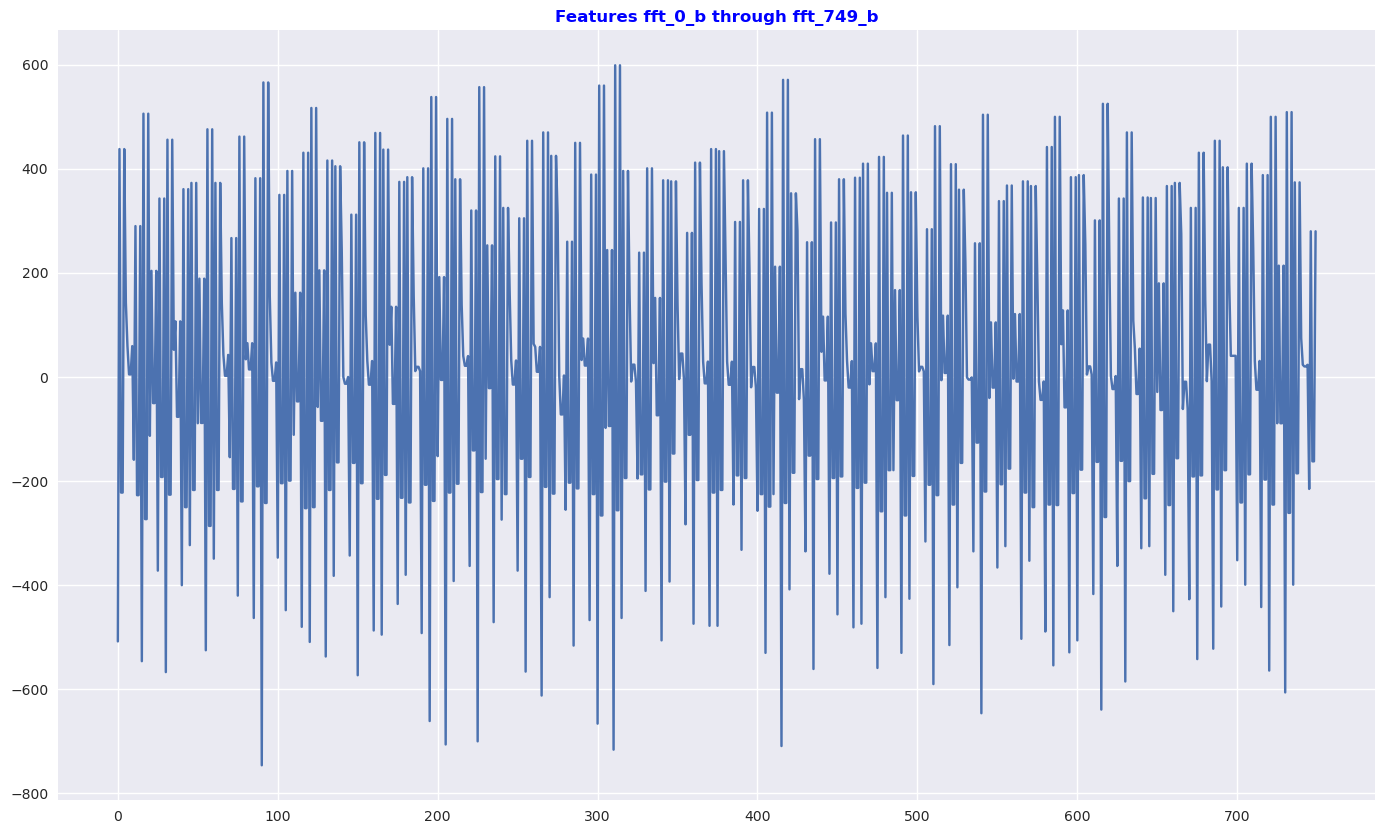

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(17,10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b", weight='bold', color='blue')
plt.show()

In [ ]:
x축 - 뇌파 신호의 주파수를 보여주고
y축 - 각 주파수에서의 뇌파 신호의 전력

그래프는 데이터셋에서 첫 번째 시도에 대한 뇌파 신호의 전력 스펙트럼을 보여주고, 


/tmp/ipykernel_32/1860708954.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


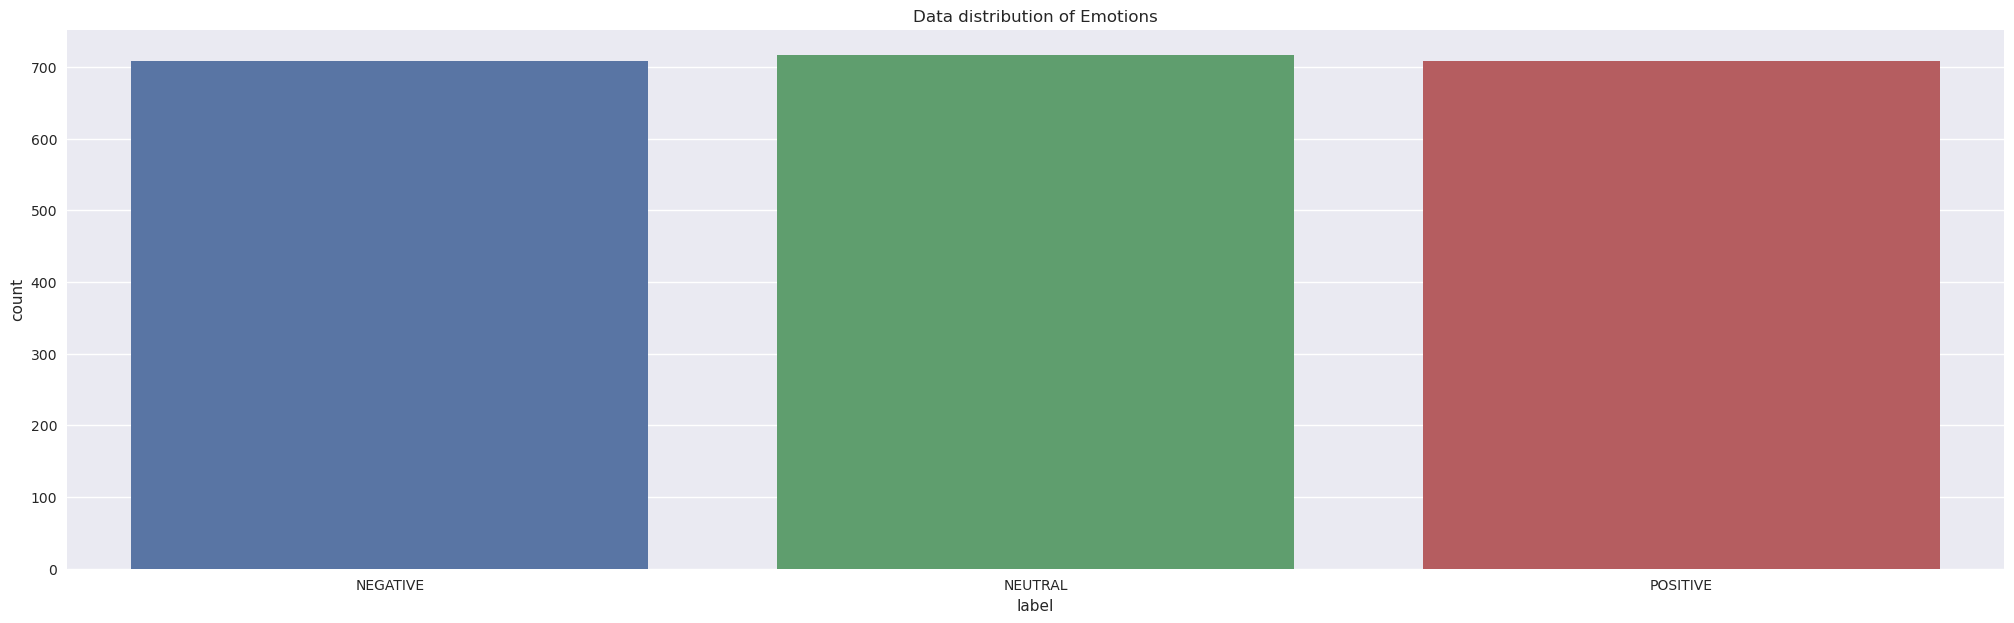

In [8]:
plt.figure(figsize=(25, 7))
plt.title("Data distribution of Emotions")
plt.style.use('seaborn')
sns.countplot(x='label', data=data)
plt.show()

In [ ]:
감정의 분배는 거의 동등합니다.
The distribution of emotions is almost equiprobable.

중립 : 716
음성: 708
양성: 708
    
Neutral : 716
Negative : 708
Positive : 708

In [9]:
#플로팅을 위한 포지티브, 네거티브 및 뉴트럴 데이터 프레임 분리
#Separating Positive,Neagtive and Neutral dataframes for plortting

pos = data.loc[data["label"] == "POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

/tmp/ipykernel_32/63328664.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


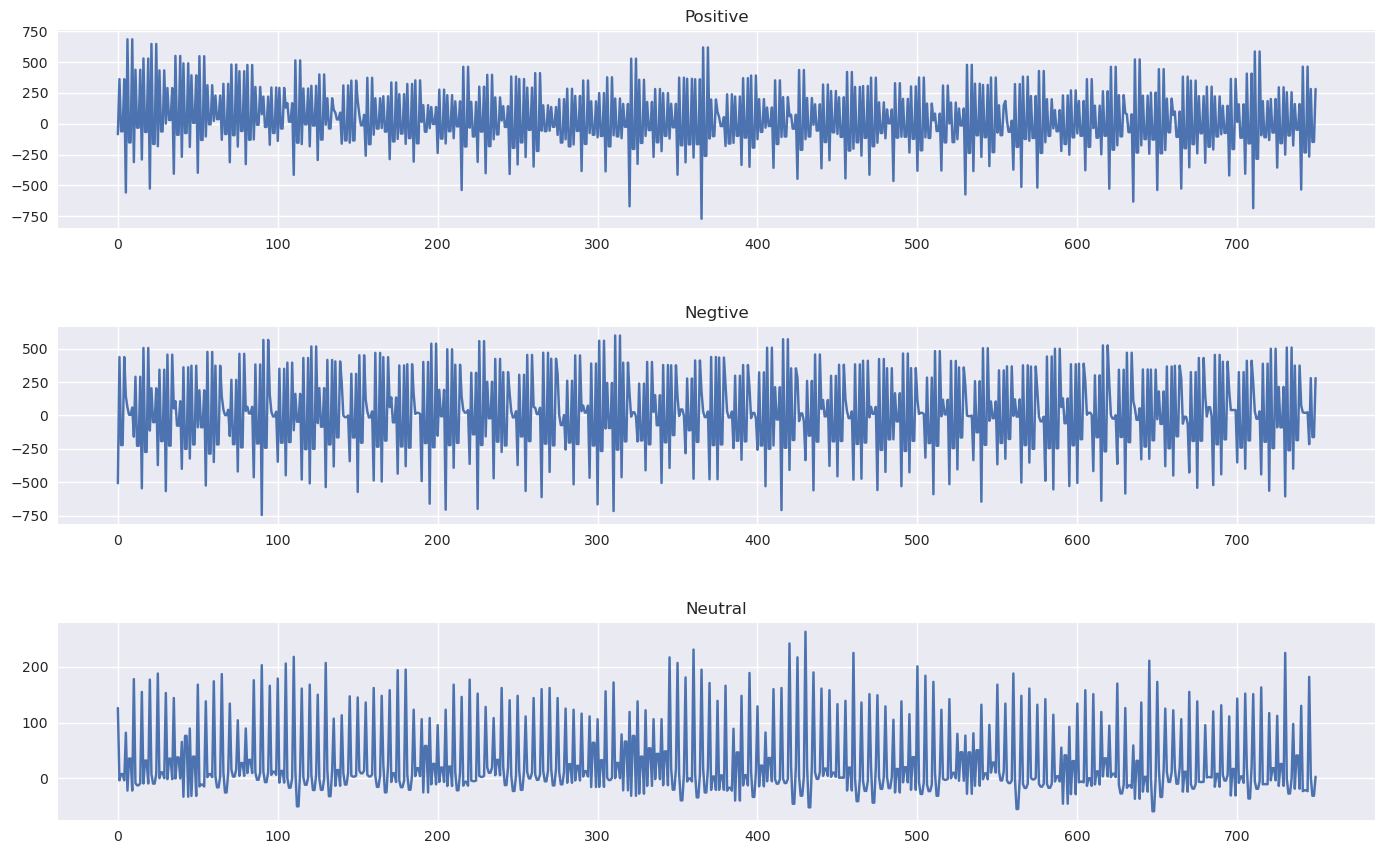

In [11]:
plt.style.use('seaborn')
fig, axs = plt.subplots(3, figsize = (17, 10))
fig.subplots_adjust(top=0.9, hspace=0.5) 
axs[0].plot(range(len(sample_pos)), sample_pos)
axs[0].set_title('Positive')
axs[1].plot(range(len(sample_neg)), sample_neg)
axs[1].set_title('Negtive')
axs[2].plot(range(len(sample_neu)), sample_neu)
axs[2].set_title('Neutral')
plt.show()

In [ ]:
대부분의 음 및 양 신호는 -600 초과 ~ -600 미만이고 중성 신호는 -50 ~ 250 사이입니다
As we can noticed the most of the Negative and Positive Signals are from greater than 600 to and less than than -600 and Neutral Signals ae in between -50 to 250

In [12]:
# Split the data

target = data['label']
data1 = data.drop(['label'], axis=1)

In [ ]:
우리는 데이터에서 정답 열을 분리합니다
we seperate the target column from the data

In [14]:
## 데이터확장 Scale the data

scaler = StandardScaler()
data2 = pd.DataFrame(scaler.fit_transform(data1))

In [ ]:
표본 x의 표준 점수는 다음과 같이 계산됩니다:

z = (x - u) / s </b> </span>


The standard score of a sample x is calculated as:

z = (x - u) / s </b></span>

In [15]:
data2

,0,1,2,3,4,5,6,7,8,9,...,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547
0,-0.696086,0.354912,-1.217244,0.118199,0.151545,0.058107,0.042167,-0.235032,0.118970,0.161980,...,0.326344,-0.383307,0.644530,0.644530,-0.383307,-0.740515,0.910153,-1.060843,-1.060843,0.910153
1,0.886267,0.657191,0.664209,0.722797,-0.095212,0.362931,0.191335,0.037871,0.223051,-0.259024,...,0.513279,-0.603560,0.269086,0.269086,-0.603560,0.672424,-0.455506,0.164015,0.164015,-0.455506
2,-0.416000,0.257751,-1.508190,0.183401,-0.031760,4.443013,0.388815,1.320424,5.284193,0.102818,...,-1.715175,1.680389,-1.614376,-1.614376,1.680389,-0.925585,0.915075,-0.929340,-0.929340,0.915075
3,-0.023357,0.495256,-0.184384,0.367151,0.010541,-0.033897,-0.039529,0.125117,0.133083,-0.108477,...,-0.537182,0.913268,-1.703555,-1.703555,0.913268,0.494472,-0.529197,0.550352,0.550352,-0.529197
4,0.853547,0.462869,0.728218,0.811708,0.024642,1.934333,-0.686747,0.040514,2.432265,0.287172,...,0.459582,-0.437429,0.803268,0.803268,-0.437429,0.448205,-0.554794,0.685331,0.685331,-0.554794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,1.121854,0.560030,0.665179,1.019168,-0.052910,0.089813,-0.244768,0.005072,-0.009279,-0.062520,...,0.597182,-0.596030,0.465440,0.465440,-0.596030,0.363500,-0.566116,0.904190,0.904190,-0.566116
2128,0.068260,0.462869,-0.868108,0.041142,-0.017660,0.232213,0.121981,0.061078,0.275385,0.345806,...,-2.141400,2.301616,-2.425906,-2.425906,2.301616,-0.101667,0.230843,-0.100870,-0.100870,0.230843
2129,-1.034217,0.138998,-0.746881,0.130054,0.179746,0.503662,0.804934,0.182107,0.117206,0.240687,...,-0.701631,1.247413,-0.963369,-0.963369,1.247413,1.476767,-1.300066,0.362209,0.362209,-1.300066
2130,0.100980,-0.767838,-0.887505,-0.312132,0.130394,0.135425,0.179580,-0.239438,0.097213,0.245969,...,-0.257618,0.089673,0.217362,0.217362,0.089673,-2.310051,2.249083,-2.084689,-2.084689,2.249083


In [16]:
# Encode the target

from sklearn.preprocessing import LabelEncoder

In [17]:
enc = LabelEncoder()
y1 = pd.DataFrame(enc.fit_transform(target))

In [ ]:
We encode the target

Neutral --> 0
Negative --> 1
Positive --> 2

목표물을 암호화합니다

중립 --> 0
음수 --> 1
양수 --> 2

In [18]:
y1

,0
0,0
1,1
2,2
3,2
4,1
...,...
2127,1
2128,2
2129,0
2130,0


In [ ]:
We split the data into test and train.
80% for training and 20% for the test .

우리는 데이터를 시험과 훈련으로 나누었습니다.
80%는 훈련용이고 20%는 시험용입니다.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data2, y1, train_size = 0.8)

In [21]:
# Modeling

from sklearn.neural_network import MLPClassifier

In [23]:
clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes=(128, 128), random_state=1)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128, 128), random_state=1,
              solver='lbfgs')

In [26]:
# Accuracy of the model

accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9578454332552693


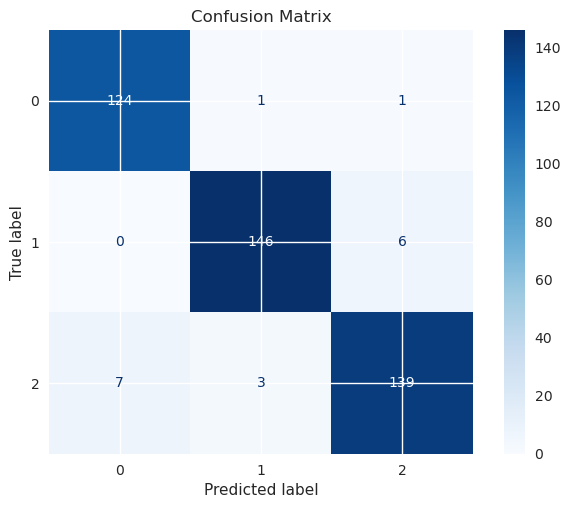

In [27]:
# Visualize the confusion matrix 혼동 행렬 시각화

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')

plt.show()

In [28]:
clr = classification_report(y_test, y_pred, target_names={"Neutral","Positive","Negative"})
print("Classification Report:\n---------------------------\n", clr)

Classification Report:
---------------------------
               precision    recall  f1-score   support

    Negative       0.95      0.98      0.96       126
     Neutral       0.97      0.96      0.97       152
    Positive       0.95      0.93      0.94       149

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427

